This is the code to calculate the deviations of a specific molecule and to make a 2D and 3D plot of it.

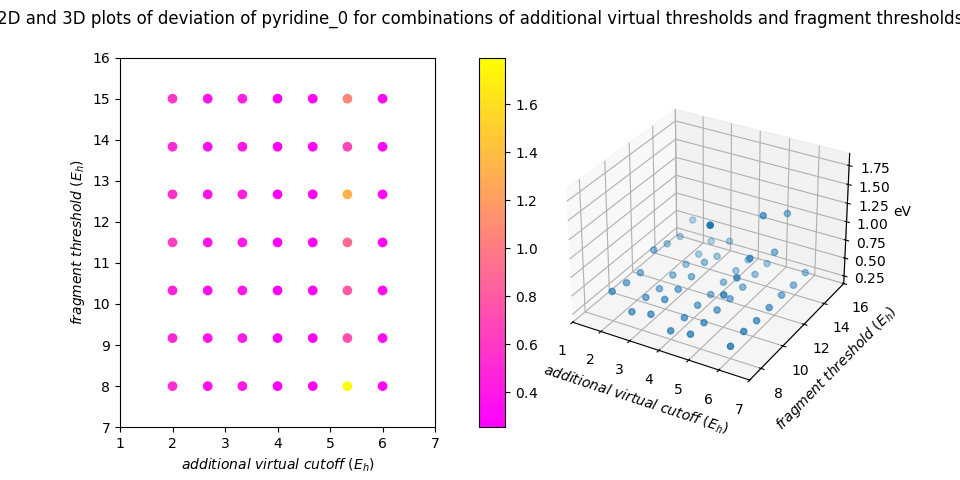

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, colors
from matplotlib.ticker import ScalarFormatter

%matplotlib widget

#The reference list, first list is bottom 5 energies, second list top 5 energies
reference_dictionary = {"pyridine_0" : [[4.3163, 4.6218, 4.8520, 4.9100, 5.1125,5.1688,5.3787,5.8416,5.9085,6.1279],[7.9391,7.9448,7.9504,7.9695,8.0133, 8.1407, 8.2045, 8.2439, 8.3365]], 
                        "pyridine_180" : [[4.3949, 4.8003, 4.8609, 5.0396, 5.0931,5.1901,5.3854,5.9635,6.1200,6.2647],[7.9364,7.9586,7.9822,8.0275,8.0293,8.2363, 8.2505, 8.2565, 8.3154, 8.3377]],
                        "benzene_0_z-axis" : [[4.1802, 4.7844, 4.8747, 4.8823, 5.2467, 5.3098, 5.3126, 5.8222, 5.8375, 6.3119],[7.7317, 7.7502, 7.7849 ,7.8340 ,7.8546 ,7.8574, 7.8851, 8.0228, 8.0288, 8.0678]],
                        "benzene_90_z-axis" : [[5.2016,5.2043,6.2854,6.3064,6.6108,6.6439,6.7356,6.7468,7.2590,7.3436],[8.1223,8.1238,8.3558,8.4153,8.4530,8.4928,8.5335,8.5475,8.5904,8.5960]],
                        "benzene_0_s-axis" : [[5.2111, 5.2113, 6.3211, 6.3226, 6.6175, 6.6195, 6.6207, 6.6211, 7.3770, 7.3825], [8.5882, 8.6742, 8.6746, 8.6854, 8.6857, 9.5186, 9.5189, 9.5242, 9.5243, 9.5328]],
                        "benzene_45_s-axis" : [[5.2113, 5.2113, 6.3211, 6.3224, 6.6185, 6.6198, 6.6215, 6.6216, 7.3786, 7.3825],[8.5836, 8.5874, 8.5875, 8.6778, 8.6781, 8.6891, 8.6892, 9.0551, 9.0558, 9.0577]],
                        "benzene_90_s-axis" : [[5.2113, 5.2113, 6.3213, 6.3223, 6.6197, 6.6198, 6.6218, 6.6222, 7.3812, 7.3812], [8.5881,8.5883,8.6805,8.6808,8.6919,8.6923, 9.0553, 9.0583, 9.5244, 9.5245]]
                       }

#Function to calculate the deviation of the eigenvalues of the parameter calculations to the reference
def RMSE(eigenvalue_matrix, ref_list):
    sums = 0
    n = 0
    rms_matrix = []
    for row in eigenvalue_matrix: #going over the rows
        rms_row = []
        for item in row: #going to the lists in the row
            #Going through the bottom 5 energies
            for value, value_ref in zip(item[:10], ref_list[0]): 
                sums += (value_ref-value)**2
                n += 1
            #Finishing the equation
            sums /= n
            rms = np.sqrt(sums)  
            rms_row.append(float(rms))
        rms_matrix.append(rms_row)
    return rms_matrix

#Navigation
start_directory = "" #Path to the folder with the molecules in your OS
os.chdir(start_directory) #Moves to the start directory
filelist = os.listdir(os.getcwd()) #Gives a list of all the directories and files in the directory

#Setting up the list needed to produce the eigenvalue matrix
eigenvalue_matrix = [] #Matrix for all the eigenvalues
parameter_matrix = [] #Matrix of all the parameters combinations correlated to their eigenvalues in the eigenvalue matrix through position
av_list = []
tf_list = []

#Producing the eigenvalue matrix
for directory in filelist:
    eigen_row = []
    av_tf_matrix = []
    os.chdir(directory)
    filelist2 = os.listdir(os.getcwd())
    
    for file in filelist2: #Goes through the files within the direcotry
        av = file[file.index("_")+2:file.index("_",file.index("_")+1)] #Takes the av from the output file name
        tf = file[file.index("_",file.index("_")+1)+2:file.index(".txt")] #Takes the ft from the output file name
        outputdata_matrix = [] #The output data from which the eigenvalues will be calculated
        f = open(file)
        text = f.read()
        #Adding the av_tf parameters of the calculation to the av_tf_matrix
        av_tf_list = []
        av_tf_list.append(float(av))
        av_tf_list.append(float(tf))
        av_tf_matrix.append(av_tf_list)
        #Making list of the av and tf parameters
        av_list.append(float(av))
        tf_list.append(float(tf))
        
        #Producing the outputdata_matrix
        for row in text.splitlines(): #Splits the data file on enter inputs
            temp_row = []
            for number in row.split():
                temp_row.append(float(number)) 
            outputdata_matrix.append(temp_row)
        #Calculates the eigenvalues of the outputdata
        outputdata_matrix = np.array(outputdata_matrix) 
        eigenvalues = np.linalg.eigvals(outputdata_matrix)
        eigen_row.append(eigenvalues.tolist())
    os.chdir("..")
    
    if eigen_row != []: #If the directory contained output data, eigen_row != []
        eigenvalue_matrix.append(eigen_row)
        parameter_matrix.append(av_tf_matrix)
    else:
        continue

#Converting the list to one with only unique av and tf values
av_list = sorted(list(set(av_list)))
tf_list = sorted(list(set(tf_list)))

#Grabs molecule
indexes_of_character = []

for i,character in enumerate(start_directory):
    if character == "/":
        indexes_of_character.append(i)

molecule = start_directory[indexes_of_character[-2]+1:indexes_of_character[-1]]

#Sorting the eigenvalue matrix from lowest to highest
for row in eigenvalue_matrix:
    for item in row:
        item.sort()

#Caluclating thhe deviation of the eigenvalues to the reference
rms_matrix = RMSE(eigenvalue_matrix, reference_dictionary[molecule])

#Plotting
#making the lists of coordinates for plotting
av_points = []
tf_points = []
deviation_points = []

#Makes the lists where the av,tf, and first_energies are correlated through their indexes
for i,row in enumerate(rms_matrix):
    for j,item in enumerate(row):
        av_points.append(parameter_matrix[i][j][0])
        tf_points.append(parameter_matrix[i][j][1])
        deviation_points.append(item)

##Calculates the average first energy
#average_energy = sum(deviation_points)/len(deviation_points)

#Filtering the data
##Get's a list of the reversed indexes where the first energy is higher than 10
#indexes_to_remove = [i for i,x in enumerate(deviation_points) if x > 10]
#
##Goes through the list in reverse and removes the points that have a first energy higher than 10
#for i in reversed(indexes_to_remove):
#    del av_points[i]
#    del tf_points[i]
#    del deviation_points [i]

#Setting up the plots
gs = gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[12,1,12]) #Determines the ratios of the subplots
fig = plt.figure(figsize=plt.figaspect(0.5)) #Makes a figure that is twice the width than height
fig.suptitle(f"2D and 3D plots of deviation of {molecule} for combinations of additional virtual thresholds and fragment thresholds")

#Adding the subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2], projection = "3d")

scatter = ax1.scatter(av_points,tf_points, c = deviation_points, cmap = 'spring', vmin = min(deviation_points), vmax = max(deviation_points)) #Makes 2D plot
ax3.scatter3D(av_points,tf_points,deviation_points) #Makes 3D plot

#Configuring the 2D plot
ax1.set_xlim(min(av_list)-1,max(av_list)+1)
ax1.set_ylim(min(tf_list)-1,max(tf_list)+1)
ax1.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
ax1.set_ylabel("$fragment \ threshold \ (E_h)$")

#Setting up the color bar
fig.colorbar(scatter, cax = ax2 )

#Formatting the numbers
formatter = ScalarFormatter(useMathText=True) #x10^n or 1e-n
formatter.set_scientific(True) #sets the format to scientific
formatter.set_powerlimits((0, 0)) #Determines between which powers it doesn't use scientific notation
ax2.yaxis.set_major_formatter(formatter)

#Configuring the 3D plot
ax3.set_xlim(min(av_list)-1,max(av_list)+1)
ax3.set_ylim(min(tf_list)-1,max(tf_list)+1)
ax3.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
ax3.set_ylabel("$fragment \ threshold \ (E_h)$")
ax3.set_zlabel("eV")
ax3.zaxis.set_major_formatter(formatter) #Formats the text of the z-axis

plt.show()

plt.savefig(f"/home/GayGirlLuna2/Documents/Test_Projects/graphs/title/av_tf_{molecule}")

The following code is used to calculate the deviation for all molecules, plot them like above, and then also plot the bottom 5 energies, for each molecule, for each additional virtual threshold, for tf = 10

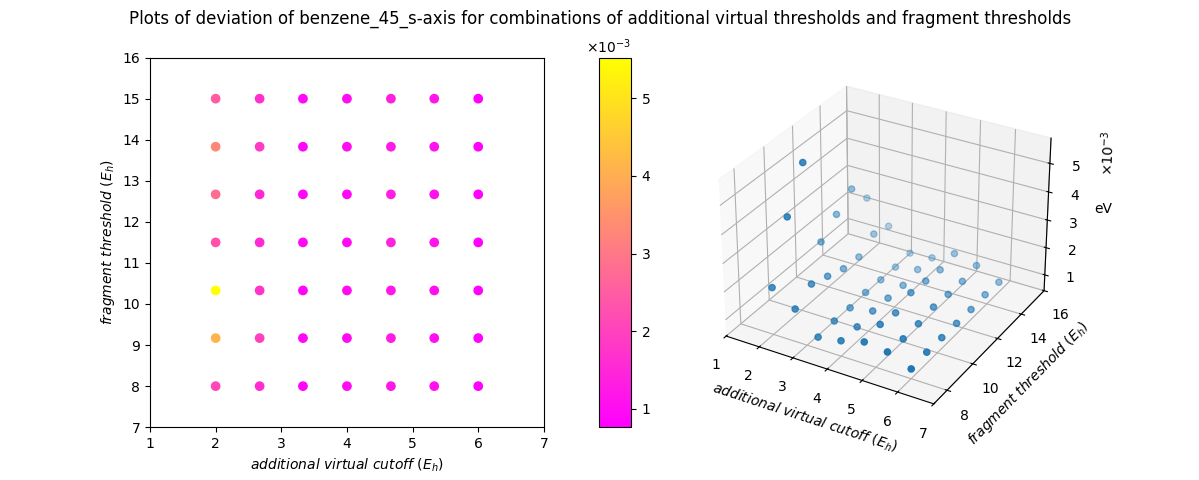

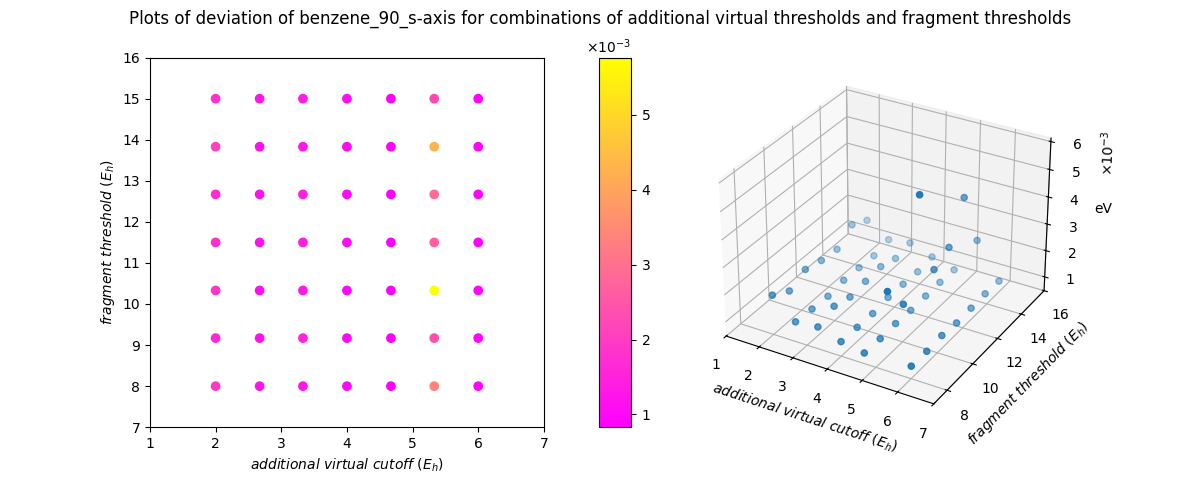

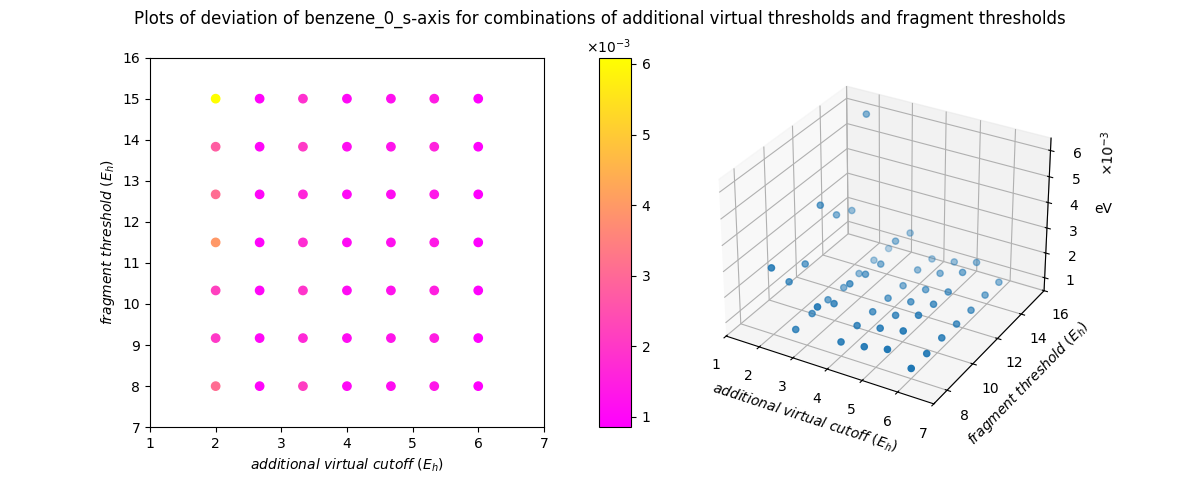

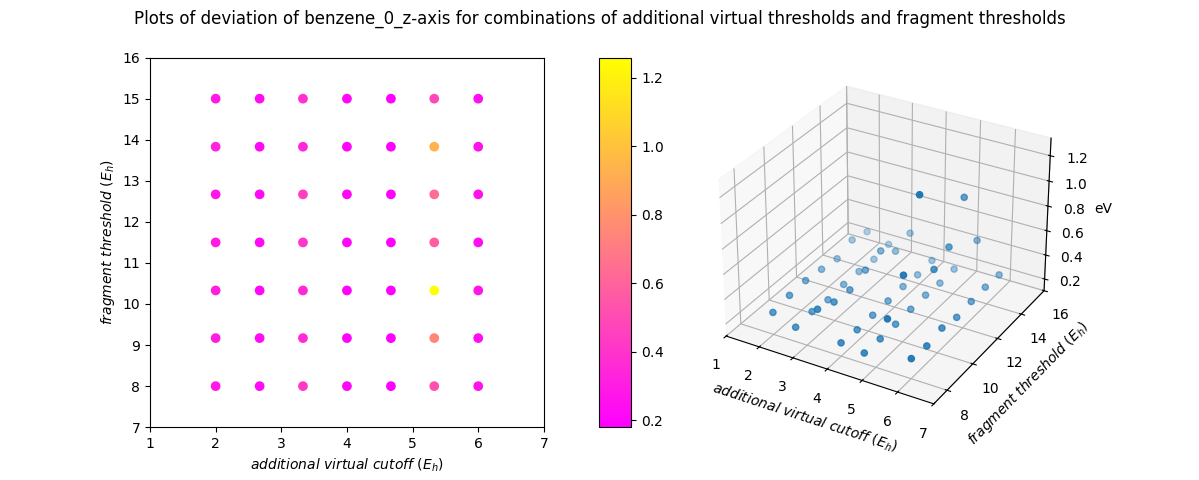

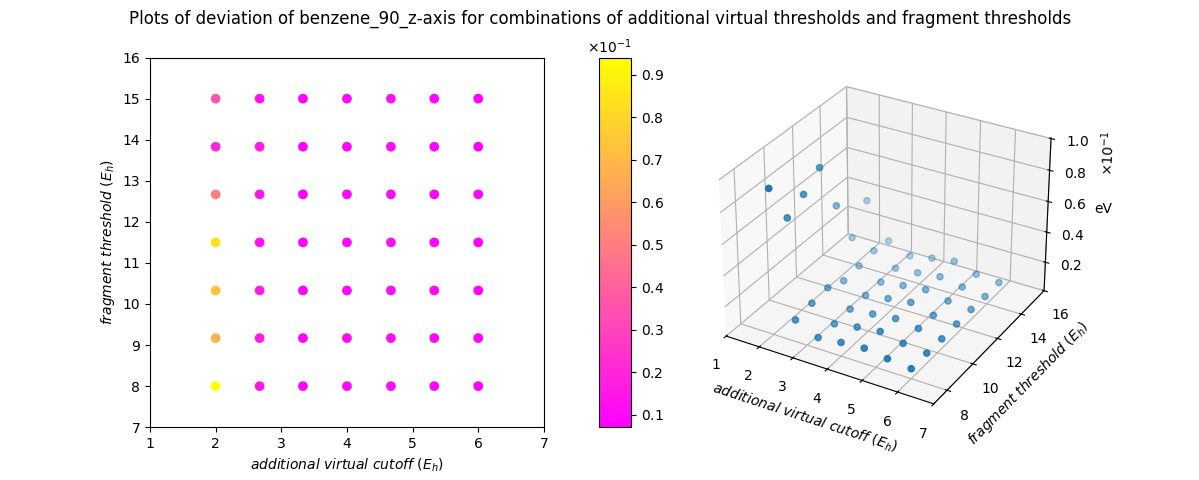

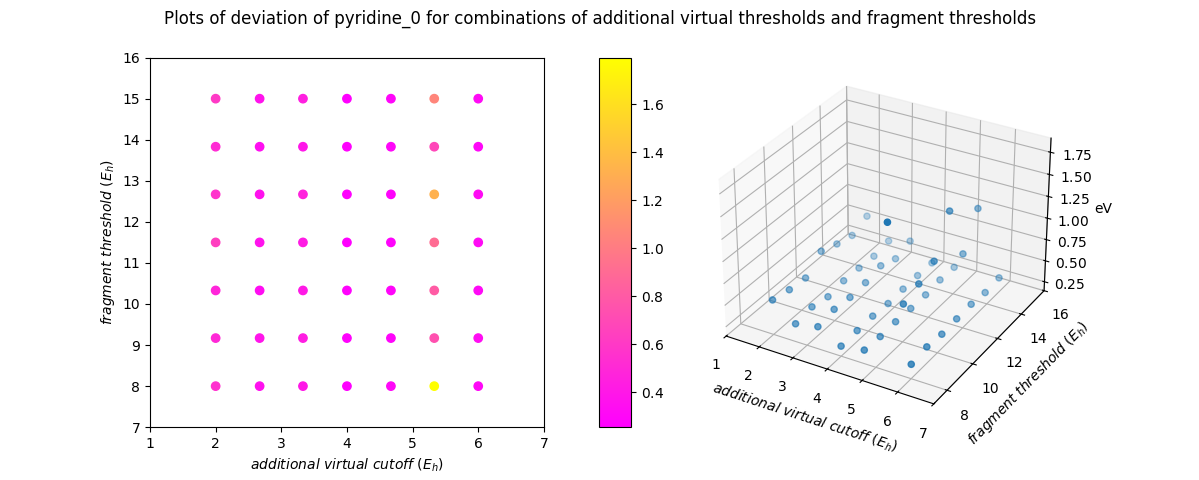

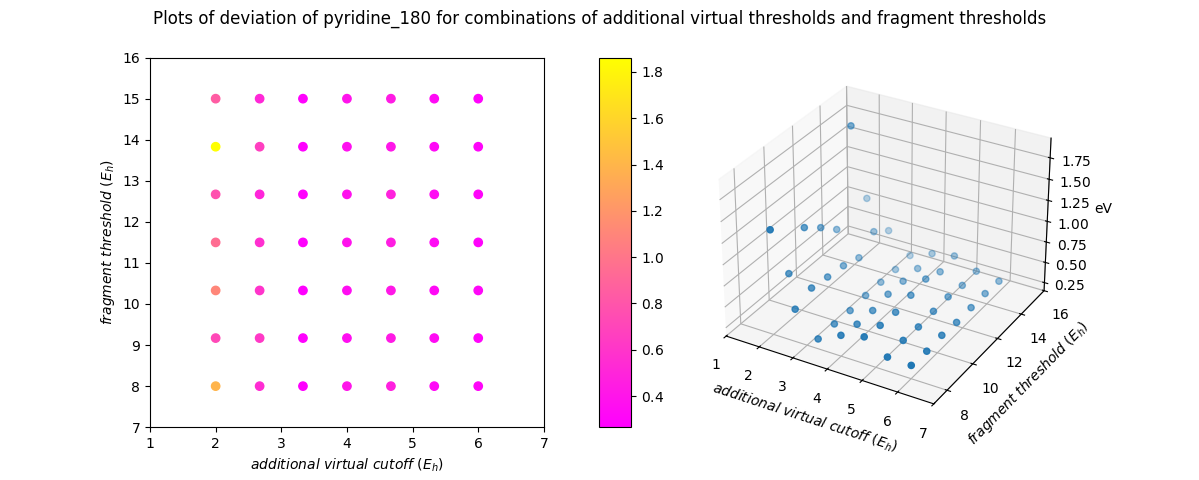

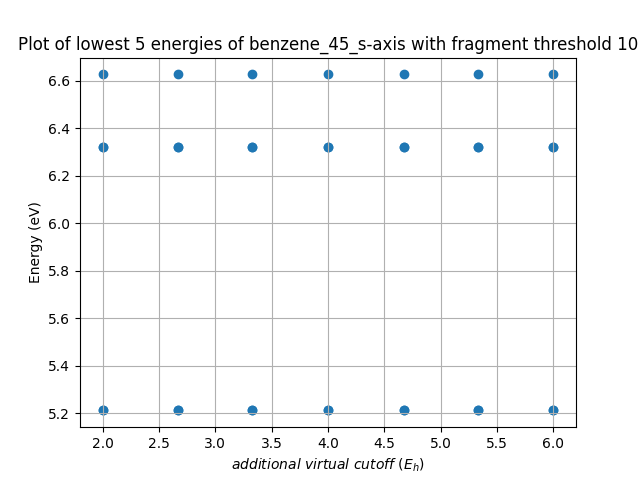

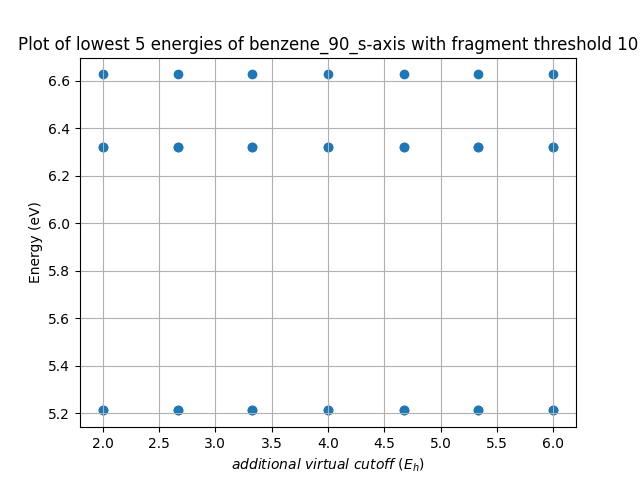

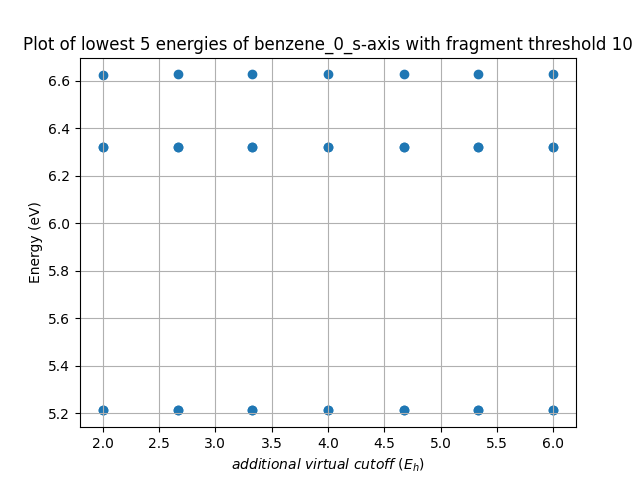

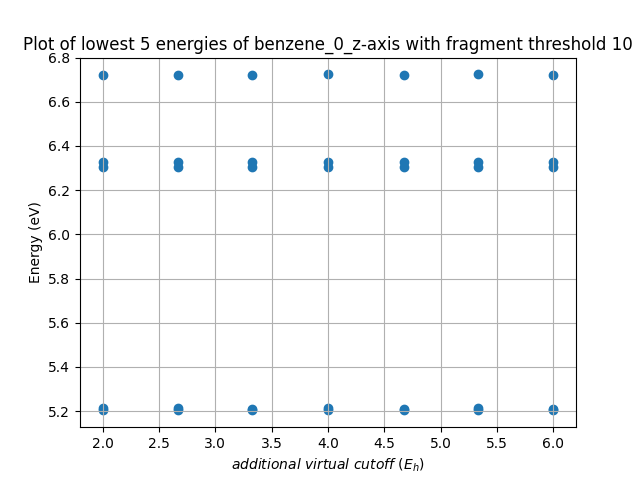

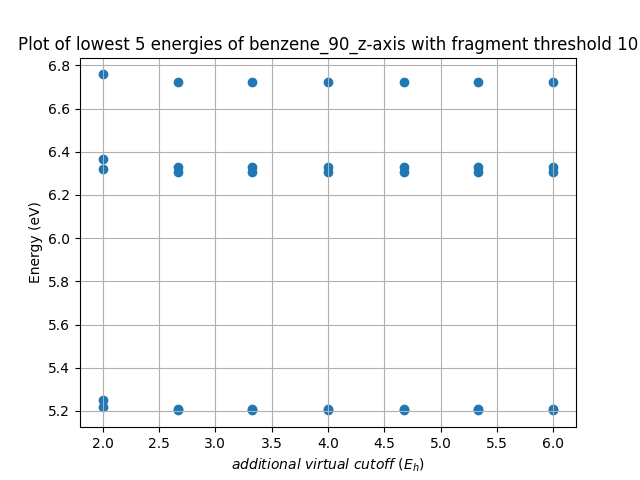

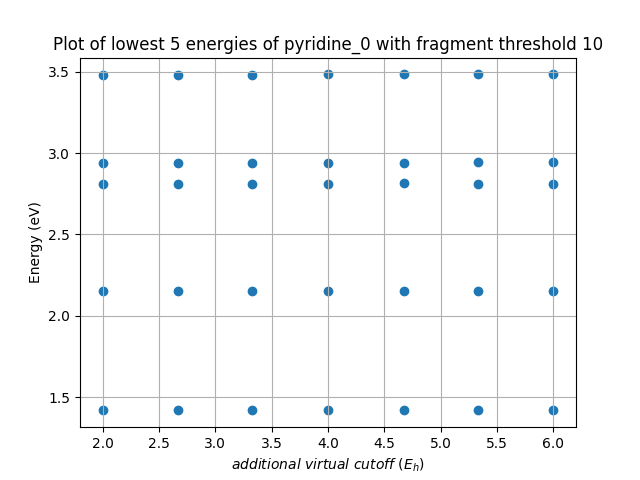

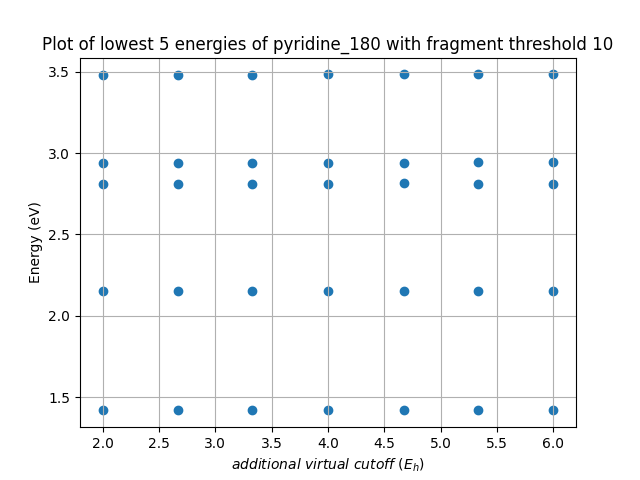

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, colors
from matplotlib.ticker import ScalarFormatter


#The reference list, first list is bottom 5 energies, second list top 5 energies
reference_dictionary = {"pyridine_0" : [[4.3163, 4.6218, 4.8520, 4.9100, 5.1125,5.1688,5.3787,5.8416,5.9085,6.1279],[7.9391,7.9448,7.9504,7.9695,8.0133, 8.1407, 8.2045, 8.2439, 8.3365]], 
                        "pyridine_180" : [[4.3949, 4.8003, 4.8609, 5.0396, 5.0931,5.1901,5.3854,5.9635,6.1200,6.2647],[7.9364,7.9586,7.9822,8.0275,8.0293,8.2363, 8.2505, 8.2565, 8.3154, 8.3377]],
                        "benzene_0_z-axis" : [[4.1802, 4.7844, 4.8747, 4.8823, 5.2467, 5.3098, 5.3126, 5.8222, 5.8375, 6.3119],[7.7317, 7.7502, 7.7849 ,7.8340 ,7.8546 ,7.8574, 7.8851, 8.0228, 8.0288, 8.0678]],
                        "benzene_90_z-axis" : [[5.2016,5.2043,6.2854,6.3064,6.6108,6.6439,6.7356,6.7468,7.2590,7.3436],[8.1223,8.1238,8.3558,8.4153,8.4530,8.4928,8.5335,8.5475,8.5904,8.5960]],
                        "benzene_0_s-axis" : [[5.2111, 5.2113, 6.3211, 6.3226, 6.6175, 6.6195, 6.6207, 6.6211, 7.3770, 7.3825], [8.5882, 8.6742, 8.6746, 8.6854, 8.6857, 9.5186, 9.5189, 9.5242, 9.5243, 9.5328]],
                        "benzene_45_s-axis" : [[5.2113, 5.2113, 6.3211, 6.3224, 6.6185, 6.6198, 6.6215, 6.6216, 7.3786, 7.3825],[8.5836, 8.5874, 8.5875, 8.6778, 8.6781, 8.6891, 8.6892, 9.0551, 9.0558, 9.0577]],
                        "benzene_90_s-axis" : [[5.2113, 5.2113, 6.3213, 6.3223, 6.6197, 6.6198, 6.6218, 6.6222, 7.3812, 7.3812], [8.5881,8.5883,8.6805,8.6808,8.6919,8.6923, 9.0553, 9.0583, 9.5244, 9.5245]]
                       }

#Creating deviation dictionary
deviation_dictionary = {}

#Function to calculate the deviation of the eigenvalues of the parameter calculations to the reference
def RMSE(eigenvalue_matrix, ref_list):
    sums = 0
    n = 0
    rms_matrix = []
    for row in eigenvalue_matrix: #going over the rows
        rms_row = []
        for item in row: #going to the lists in the row
            #Going through the bottom 5 energies
            for value, value_ref in zip(item, ref_list[0]): #Going through the bottom energies
                sums += (value_ref-value)**2
                n += 1
            ##Going through the top 5 energies
            #for value, value_ref in zip(item[-5:], ref_list[1]): #going through the top 5 energies
            #    sums += (value_ref-value)**2
            #    n += 1"fragment threshold""fragment threshold"\
            sums /= n
            rms = np.sqrt(sums)  
            rms_row.append(float(rms))
        rms_matrix.append(rms_row)
    return rms_matrix

#Moves to starting directory and gets the filelist
start_directory =  "" #Path to the folder with the molecules in your OS
os.chdir(start_directory)
filelist = os.listdir(os.getcwd())

#setting up lists for later
molecules = []
list_of_eigenvalue_matrix = []
list_of_parameter_matrix = []
av_list = []
tf_list = []

#Producing the deviation dictionary

#Adding values to the deviation dictionary
for molecule in filelist:

    #Filter to ignore certain molecules
    molecules_to_be_ignored = ["ethylene", "benzene"]
    if molecule in molecules_to_be_ignored:
        continue
    molecules.append(molecule) #Adds to list of molecules
    
    #Navigation
    os.chdir(molecule) #Moves to the molecule directory
    filelist2 = os.listdir(os.getcwd()) #Gives a list of all the directories and files in the directory
    
    #Setting up the list needed to produce the eigenvalue matrix
    eigenvalue_matrix = [] #Matrix for all the eigenvalues
    parameter_matrix = [] #Matrix of all the parameters combinations correlated to their eigenvalues in the eigenvalue matrix through position
    
    #Producing the eigenvalue matrix
    for directory in filelist2:
        eigen_row = []
        av_tf_matrix = []
        
        os.chdir(directory)
        filelist3 = os.listdir(os.getcwd())
        
        for file in filelist3: #Goes through the files within the directory
            av = file[file.index("_")+2:file.index("_",file.index("_")+1)] #Takes the av from the output file name
            tf = file[file.index("_",file.index("_")+1)+2:file.index(".txt")] #Takes the ft from the output file name
            outputdata_matrix = [] #Matrix from which the eigenvalues will be calculated
            f = open(file)
            text = f.read()

            #Making the overall list
            av_list.append(float(av))
            tf_list.append(float(tf))

            #Adding the av_tf parameters of the calculation to the av_tf_matrix
            av_tf_list = []
            av_tf_list.append(float(av))
            av_tf_list.append(float(tf))
            av_tf_matrix.append(av_tf_list)

            #Producing the outputdata_matrix
            for row in text.splitlines(): #Splits the data file on enter inputs
                temp_row = []
                for data in row.split():
                    temp_row.append(float(data)) 
                outputdata_matrix.append(temp_row)

            #Calculates the eigenvalues of the outputdata
            outputdata_matrix = np.array(outputdata_matrix) 
            eigenvalues = np.linalg.eigvals(outputdata_matrix)
            eigen_row.append(eigenvalues.tolist())
        os.chdir("..")
        
        if eigen_row != []: #If the directory contained output data, eigen_row != []
            eigenvalue_matrix.append(eigen_row)
            parameter_matrix.append(av_tf_matrix)
        else:
            continue
            
    #Sorting the eigenvalue matrix from lowest to highest
    for row in eigenvalue_matrix:
        for item in row:
            item.sort()
            
    #Creating a list of eigenvalue and parameter matrix of each molecule
    list_of_eigenvalue_matrix.append(eigenvalue_matrix)
    list_of_parameter_matrix.append(parameter_matrix)
        
    #Calculating the deviation from the reference
    rms_matrix = []
    rms_matrix = RMSE(eigenvalue_matrix, reference_dictionary[molecule])

    #Adding to deviation dictionary
    for i, row in enumerate(rms_matrix):
        for j, item in enumerate(row):
            if f"{parameter_matrix[i][j][0]}_{parameter_matrix[i][j][1]}" in deviation_dictionary:
                deviation_dictionary[f"{parameter_matrix[i][j][0]}_{parameter_matrix[i][j][1]}"].append(item)
            else:
                deviation_dictionary[f"{parameter_matrix[i][j][0]}_{parameter_matrix[i][j][1]}"] = [item]
        
    #Goes back into the folder with the molecules
    os.chdir("..")

#Converting the list to one with only unique av and tf values
av_list = sorted(list(set(av_list)))
tf_list = sorted(list(set(tf_list)))
    
#Making a list that will be a list of coordinates for a axis to plot
av = []
tf = []
deviation = []

#Goes through the deviation dictionary for every molecule and makes lists of lists for the coordinates
for molecule in molecules:
    molecule_av = []
    molecule_tf = []
    molecule_deviation = []

    #Taking out the data
    for key,value in deviation_dictionary.items():
        parameter_av, parameter_tf = key.split("_")
        molecule_deviation.append(value[molecules.index(molecule)])
        molecule_av.append(float(parameter_av))
        molecule_tf.append(float(parameter_tf))

    #Adding the lists of coordinates to the overall list for all molecules
    av.append(molecule_av)
    tf.append(molecule_tf)
    deviation.append(molecule_deviation)
    
#Plotting all the plots
for molecule in molecules:
    #Setting up the plots
    gs = gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[12,1,12]) #Determines the ratios of the subplots
    fig = plt.figure(figsize=plt.figaspect(0.4)) #Makes a figure that is twice the width than height
    fig.suptitle(f"Plots of deviation of {molecule} for combinations of additional virtual thresholds and fragment thresholds")
    
    #Adding the subplots
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2], projection = "3d")
    
    scatter = ax1.scatter(av[molecules.index(molecule)],tf[molecules.index(molecule)], c = deviation[molecules.index(molecule)], cmap = 'spring', vmin = min(deviation[molecules.index(molecule)]), vmax = max(deviation[molecules.index(molecule)])) #Makes 2D plot
    ax3.scatter3D(av[molecules.index(molecule)],tf[molecules.index(molecule)],deviation[molecules.index(molecule)]) #Makes 3D plot
    
    #Configuring the 2D plot
    ax1.set_xlim(min(av_list)-1,max(av_list)+1)
    ax1.set_ylim(min(tf_list)-1,max(tf_list)+1)
    ax1.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
    ax1.set_ylabel("$fragment \ threshold \ (E_h)$")
    
    #Setting up the color bar
    fig.colorbar(scatter, cax = ax2 )
    
    #Formatting the numbers
    formatter = ScalarFormatter(useMathText=True) #x10^n or 1e-n
    formatter.set_scientific(True) #sets the format to scientific
    formatter.set_powerlimits((0, 0)) #Determines between which powers it doesn't use scientific notation
    ax2.yaxis.set_major_formatter(formatter)
    
    #Configuring the 3D plot
    ax3.set_xlim(min(av_list)-1,max(av_list)+1)
    ax3.set_ylim(min(tf_list)-1,max(tf_list)+1)
    ax3.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
    ax3.set_ylabel("$fragment \ threshold \ (E_h)$")
    ax3.set_zlabel("eV")
    ax3.zaxis.set_major_formatter(formatter) #Formats the text of the z-axis

    plt.savefig(f"/home/GayGirlLuna2/Documents/Test_Projects/graphs/title/av_tf_{molecule}")

#Plotting the bottom 5 energies
for molecule in molecules:
    
    #Setting up the plots
    energy_plot_av = []
    energy_plot_eigenvalues = []
    energy_plot_av_extended = []
    energy_plot_eigenvalues_extended = []
    
    #Getting lists of the parameters and the bottom 5 eigenvalues of those parameters, per molecule
    for i, row in enumerate(list_of_eigenvalue_matrix[molecules.index(molecule)]):
        for j, item in enumerate(row):
            if list_of_parameter_matrix[molecules.index(molecule)][i][j][1] == 10.33:
                energy_plot_av.append(list_of_parameter_matrix[molecules.index(molecule)][i][j][0])
                energy_plot_eigenvalues.append(item[:5])
    
    fig, ax4 = plt.subplots()
    fig.set_figwidth = 30
    fig.set_figheight = 15

    #Creating a new list that extends the parameter values to the lenght of the numer of eigenvalues per combination for easy plotting.
    for x,y in zip(energy_plot_av,energy_plot_eigenvalues):
       energy_plot_av_extended.extend([x]*len(y))
       energy_plot_eigenvalues_extended.extend(y)

    #Plotting and customizing the plot
    ax4.scatter(energy_plot_av_extended,energy_plot_eigenvalues_extended, marker = 'o')
    ax4.set_title(f"Plot of lowest 5 energies of {molecule} with fragment threshold 10")
    ax4.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
    ax4.set_ylabel("Energy (eV)")
    ax4.grid(True)

    plt.savefig(f"/home/GayGirlLuna2/Documents/Test_Projects/graphs/title/bottom_5_{molecule}")

The following cell graphs the deviationof a combination of the angle and the av to each other

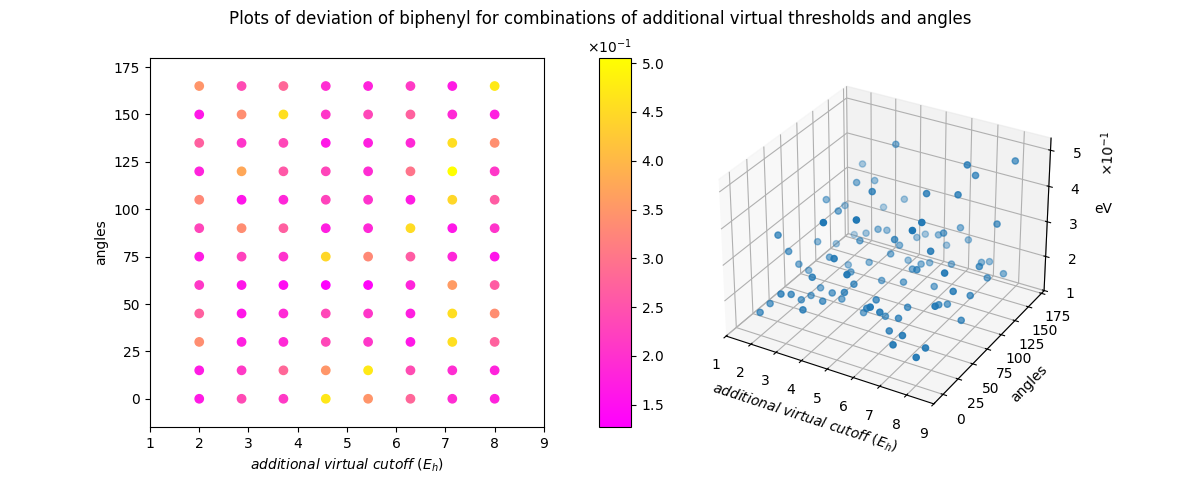

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, colors
from matplotlib.ticker import ScalarFormatter

%matplotlib widget


#The reference list, first list is bottom 5 energies, second list top 5 energies
reference_dictionary = {"pyridine_0" : [[4.3163, 4.6218, 4.8520, 4.9100, 5.1125,5.1688,5.3787,5.8416,5.9085,6.1279],[7.9391,7.9448,7.9504,7.9695,8.0133, 8.1407, 8.2045, 8.2439, 8.3365]], 
                        "pyridine_180" : [[4.3949, 4.8003, 4.8609, 5.0396, 5.0931,5.1901,5.3854,5.9635,6.1200,6.2647],[7.9364,7.9586,7.9822,8.0275,8.0293,8.2363, 8.2505, 8.2565, 8.3154, 8.3377]],
                        "benzene_0_z-axis" : [[4.1802, 4.7844, 4.8747, 4.8823, 5.2467, 5.3098, 5.3126, 5.8222, 5.8375, 6.3119],[7.7317, 7.7502, 7.7849 ,7.8340 ,7.8546 ,7.8574, 7.8851, 8.0228, 8.0288, 8.0678]],
                        "benzene_90_z-axis" : [[5.2016,5.2043,6.2854,6.3064,6.6108,6.6439,6.7356,6.7468,7.2590,7.3436],[8.1223,8.1238,8.3558,8.4153,8.4530,8.4928,8.5335,8.5475,8.5904,8.5960]],
                        "benzene_0_s-axis" : [[5.2111, 5.2113, 6.3211, 6.3226, 6.6175, 6.6195, 6.6207, 6.6211, 7.3770, 7.3825], [8.5882, 8.6742, 8.6746, 8.6854, 8.6857, 9.5186, 9.5189, 9.5242, 9.5243, 9.5328]],
                        "benzene_45_s-axis" : [[5.2113, 5.2113, 6.3211, 6.3224, 6.6185, 6.6198, 6.6215, 6.6216, 7.3786, 7.3825],[8.5836, 8.5874, 8.5875, 8.6778, 8.6781, 8.6891, 8.6892, 9.0551, 9.0558, 9.0577]],
                        "benzene_90_s-axis" : [[5.2113, 5.2113, 6.3213, 6.3223, 6.6197, 6.6198, 6.6218, 6.6222, 7.3812, 7.3812], [8.5881,8.5883,8.6805,8.6808,8.6919,8.6923, 9.0553, 9.0583, 9.5244, 9.5245]],
                        "biphenyl_0" : [[4.7442, 4.9985, 5.1642, 6.0532, 6.1932, 6.4708, 6.5074, 6.6191, 6.7459, 6.8516],[8.2614,8.2902,8.3179,8.3514,8.3900,8.4326,8.5012,8.5044,8.7119,8.7621]],
                        "biphenyl_15" : [[4.7933,5.0574,5.1374,6.0621,6.2561,6.4702,6.4840,6.6454,6.7855,6.8352],[8.2355,8.2820,8.3274,8.3370,8.3476,8.3573,8.4373,8.5418,8.7013,8.7800]],
                        "biphenyl_30" : [[4.9403,5.1120,5.2470,6.1636,6.4187,6.4534,6.5441,6.7219,6.8552,6.8911],[8.1466,8.2130,8.2725,8.2986,8.3363,8.3898,8.3931,8.4031,8.6410,8.6980]],
                        "biphenyl_45" : [[5.1224,5.1319,5.5149,6.2907,6.4304,6.6162,6.7357,6.7796,6.8705,6.8779],[8.1920,8.2045,8.2545,8.2786,8.2907,8.3483,8.3936,8.4864,8.6231,8.6348]],
                        "biphenyl_60" : [[5.1983,5.3016,5.8371,6.4615,6.7719,6.7881,6.8148,6.9208,6.9426,7.0065],[8.2323,8.2785,8.3032,8.3345,8.3636,8.4426,8.4988,8.5450,8.6218,8.6317]],
                        "biphenyl_75" : [[5.2194,5.3244,6.1267,6.3936,6.5699,6.7172,6.7667,6.7995,6.8437,6.9048],[8.2479,8.2516,8.2530,8.2844,8.2989,8.3198,8.3588,8.3617,8.4402,8.4732]],
                        "biphenyl_90" : [[5.2870,5.2871,6.3035,6.3826,6.6752,6.6752,6.7414,6.7590,6.8371,6.9054],[8.1482,8.2577,8.2700,8.2725,8.2806,8.3255,8.3317,8.3851,8.3882,8.3883]],
                        "biphenyl_105" : [[5.2194,5.3245,6.1267,6.3937,6.5700,6.7174,6.7667,6.7995,6.8438,6.9049],[8.2481,8.2518,8.2533,8.2845,8.2994,8.3202,8.3590,8.3617,8.4401,8.4733]],
                        "biphenyl_120" : [[5.1754,5.2915,5.8118,6.3832,6.4427,6.4446,6.7537,6.7666,6.7993,6.8911],[8.1981,8.2660,8.2833,8.2925,8.3214,8.3503,8.3630,8.4291,8.4543,8.6188]],
                        "biphenyl_135" : [[5.1225,5.1319,5.5149,6.2909,6.4304,6.6162,6.7357,6.7797,6.8705,6.8780],[8.1922,8.2047,8.2547,8.2788,8.2909,8.3480,8.3938,8.4883,8.6234,8.6348]],
                        "biphenyl_150" : [[4.9403,5.1120,5.2470,6.1635,6.4188,6.4534,6.5441,6.7219,6.8553,6.8912],[8.1466,8.2130,8.2736,8.2985,8.3362,8.3932,8.3975,8.4050,8.6413,8.6965]],
                        "biphenyl_165" : [[4.7933,5.0574,5.1373,6.0621,6.2561,6.4701,6.4840,6.6453,6.7855,6.8352],[8.2354,8.2819,8.3274,8.3369,8.3476,8.3573,8.4373,8.5421,8.7013,8.7851]]
                       }

#Creating deviation dictionary
deviation_dictionary = {}

#Function to calculate the deviation of the eigenvalues of the parameter calculations to the reference
def RMSE(eigenvalue_row, ref_list):
    sums = 0
    n = 0
    rms_row = []
    for item in eigenvalue_row: #going over the items in the row
        for value, value_ref in zip(item, ref_list[0]): #Going through the bottom energies
            sums += (value_ref-value)**2
            n += 1
        sums /= n
        rms = np.sqrt(sums)  
        rms_row.append(float(rms))
    return rms_row

#Navigation
start_directory =  "" #Path to the folder with the molecules in your OS
os.chdir(start_directory) #Moves to the start directory
filelist = os.listdir(os.getcwd()) #Gives a list of all the directories and files in the directory

#Setting up the list needed to produce the eigenvalue matrix
eigenvalue_matrix = [] #Matrix for all the eigenvalues
parameter_matrix = [] #Matrix of all the parameters combinations correlated to their eigenvalues in the eigenvalue matrix through position
av_list2 = [] #List of av values
angles = [] #List of angles

#Producing the eigenvalue matrix
for angle in filelist: #Goes through the angles
    eigen_row = [] #Temporary list to save data
    av_angle_matrix = []#Temporary list to save data
    angles.append(float(angle))
    
    os.chdir(angle) 
    filelist2 = os.listdir(os.getcwd())
    
    for av in filelist2: #Goes through the files within the direcotry
        av_list2.append(float(av))
        
        #Adding the av and angle parameters of the calculation to the av_angle_matrix
        av_angle_list = [] #Temporary list
        av_angle_list.append(float(av))
        av_angle_list.append(float(angle))
        av_angle_matrix.append(av_angle_list)
        
        os.chdir(av)
        filelist3 = os.listdir(os.getcwd())
        
        for file in filelist3:
            outputdata_matrix = [] #The output data from which the eigenvalues will be calculated
            f = open(file)
            text = f.read()

            
            #Producing the outputdata_matrix
            for row in text.splitlines(): #Splits the data file on enter inputs
                temp_row = []
                for number in row.split():
                    temp_row.append(float(number)) 
                outputdata_matrix.append(temp_row)
            
            #Calculates the eigenvalues of the outputdata
            outputdata_matrix = np.array(outputdata_matrix) 
            eigenvalues = np.linalg.eigvals(outputdata_matrix)
            eigen_row.append(eigenvalues.tolist())
        os.chdir("..")
    os.chdir("..")
    
    if eigen_row != []: #If the directory contained output data, eigen_row != []
        eigenvalue_matrix.append(eigen_row)
        parameter_matrix.append(av_angle_matrix)
    else:
        continue
        
os.chdir("..")

#Grabs molecule
indexes_of_character = []

for i,character in enumerate(start_directory):
    if character == "/":
        indexes_of_character.append(i)

molecule = start_directory[indexes_of_character[-1]+1:]

#Sorting the eigenvalue matrix from lowest to highest
for row in eigenvalue_matrix:
    for item in row:
        item.sort()

#Caluclating thhe deviation of the eigenvalues to the reference
rms_matrix = []

for i,row in enumerate(eigenvalue_matrix):
    rms_matrix.append(RMSE(row,reference_dictionary[f"biphenyl_{angles[i]:g}"]))

#Plotting
#making the lists of coordinates for plotting
av_points = []
angle_points = []
deviation_points = []

#Makes the lists where the av,tf, and first_energies are correlated through their indexes
for i,row in enumerate(rms_matrix):
    for j,item in enumerate(row):
        av_points.append(parameter_matrix[i][j][0])
        angle_points.append(parameter_matrix[i][j][1])
        deviation_points.append(item)

#Setting up the plots
gs = gridspec.GridSpec(nrows=1,ncols=3, width_ratios=[12,1,12]) #Determines the ratios of the subplots
fig = plt.figure(figsize=plt.figaspect(0.4)) #Makes a figure that is twice the width than height
fig.suptitle(f"Plots of deviation of {molecule} for combinations of additional virtual thresholds and angles")

#Adding the subplots
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2], projection = "3d")

scatter = ax1.scatter(av_points,angle_points, c = deviation_points, cmap = 'spring', vmin = min(deviation_points), vmax = max(deviation_points)) #Makes 2D plot
ax3.scatter3D(av_points,angle_points,deviation_points) #Makes 3D plot

#Configuring the 2D plot
ax1.set_xlim(min(av_list2)-1,max(av_list2)+1)
ax1.set_ylim(min(angles)-15,max(angles)+15)
ax1.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
ax1.set_ylabel("angles")

#Setting up the color bar
fig.colorbar(scatter, cax = ax2 )

#Formatting the numbers
formatter = ScalarFormatter(useMathText=True) #x10^n or 1e-n
formatter.set_scientific(True) #sets the format to scientific
formatter.set_powerlimits((0, 0)) #Determines between which powers it doesn't use scientific notation
ax2.yaxis.set_major_formatter(formatter)

#Configuring the 3D plot
ax3.set_xlim(min(av_list2)-1,max(av_list2)+1)
ax3.set_ylim(min(angles)-15,max(angles)+15)
ax3.set_xlabel("$additional \ virtual \ cutoff \ (E_h)$")
ax3.set_ylabel("angles")
ax3.set_zlabel("eV")
ax3.zaxis.set_major_formatter(formatter) #Formats the text of the z-axis

plt.show()

plt.savefig(f"/home/GayGirlLuna2/Documents/Test_Projects/graphs/title/av_angle_{molecule}")